In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
)

In [94]:
df = pd.read_csv("laptops-v1.csv")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                791 non-null    object 
 1   Model                791 non-null    object 
 2   Type                 791 non-null    object 
 3   Dimension (in)       717 non-null    float64
 4   Screen Resolution    791 non-null    object 
 5   CPU Brand            791 non-null    object 
 6   CPU Model            791 non-null    object 
 7   CPU Frequency (GHz)  791 non-null    float64
 8   GPU Brand            791 non-null    object 
 9   GPU Model            742 non-null    object 
 10  RAM (GB)             791 non-null    int64  
 11  HDD                  791 non-null    bool   
 12  SSD                  791 non-null    bool   
 13  OS                   791 non-null    object 
 14  Weight (kg)          742 non-null    float64
 15  Price (Euro)         781 non-null    flo

In [96]:
df.isna().sum()

Brand                   0
Model                   0
Type                    0
Dimension (in)         74
Screen Resolution       0
CPU Brand               0
CPU Model               0
CPU Frequency (GHz)     0
GPU Brand               0
GPU Model              49
RAM (GB)                0
HDD                     0
SSD                     0
OS                      0
Weight (kg)            49
Price (Euro)           10
dtype: int64

In [97]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99


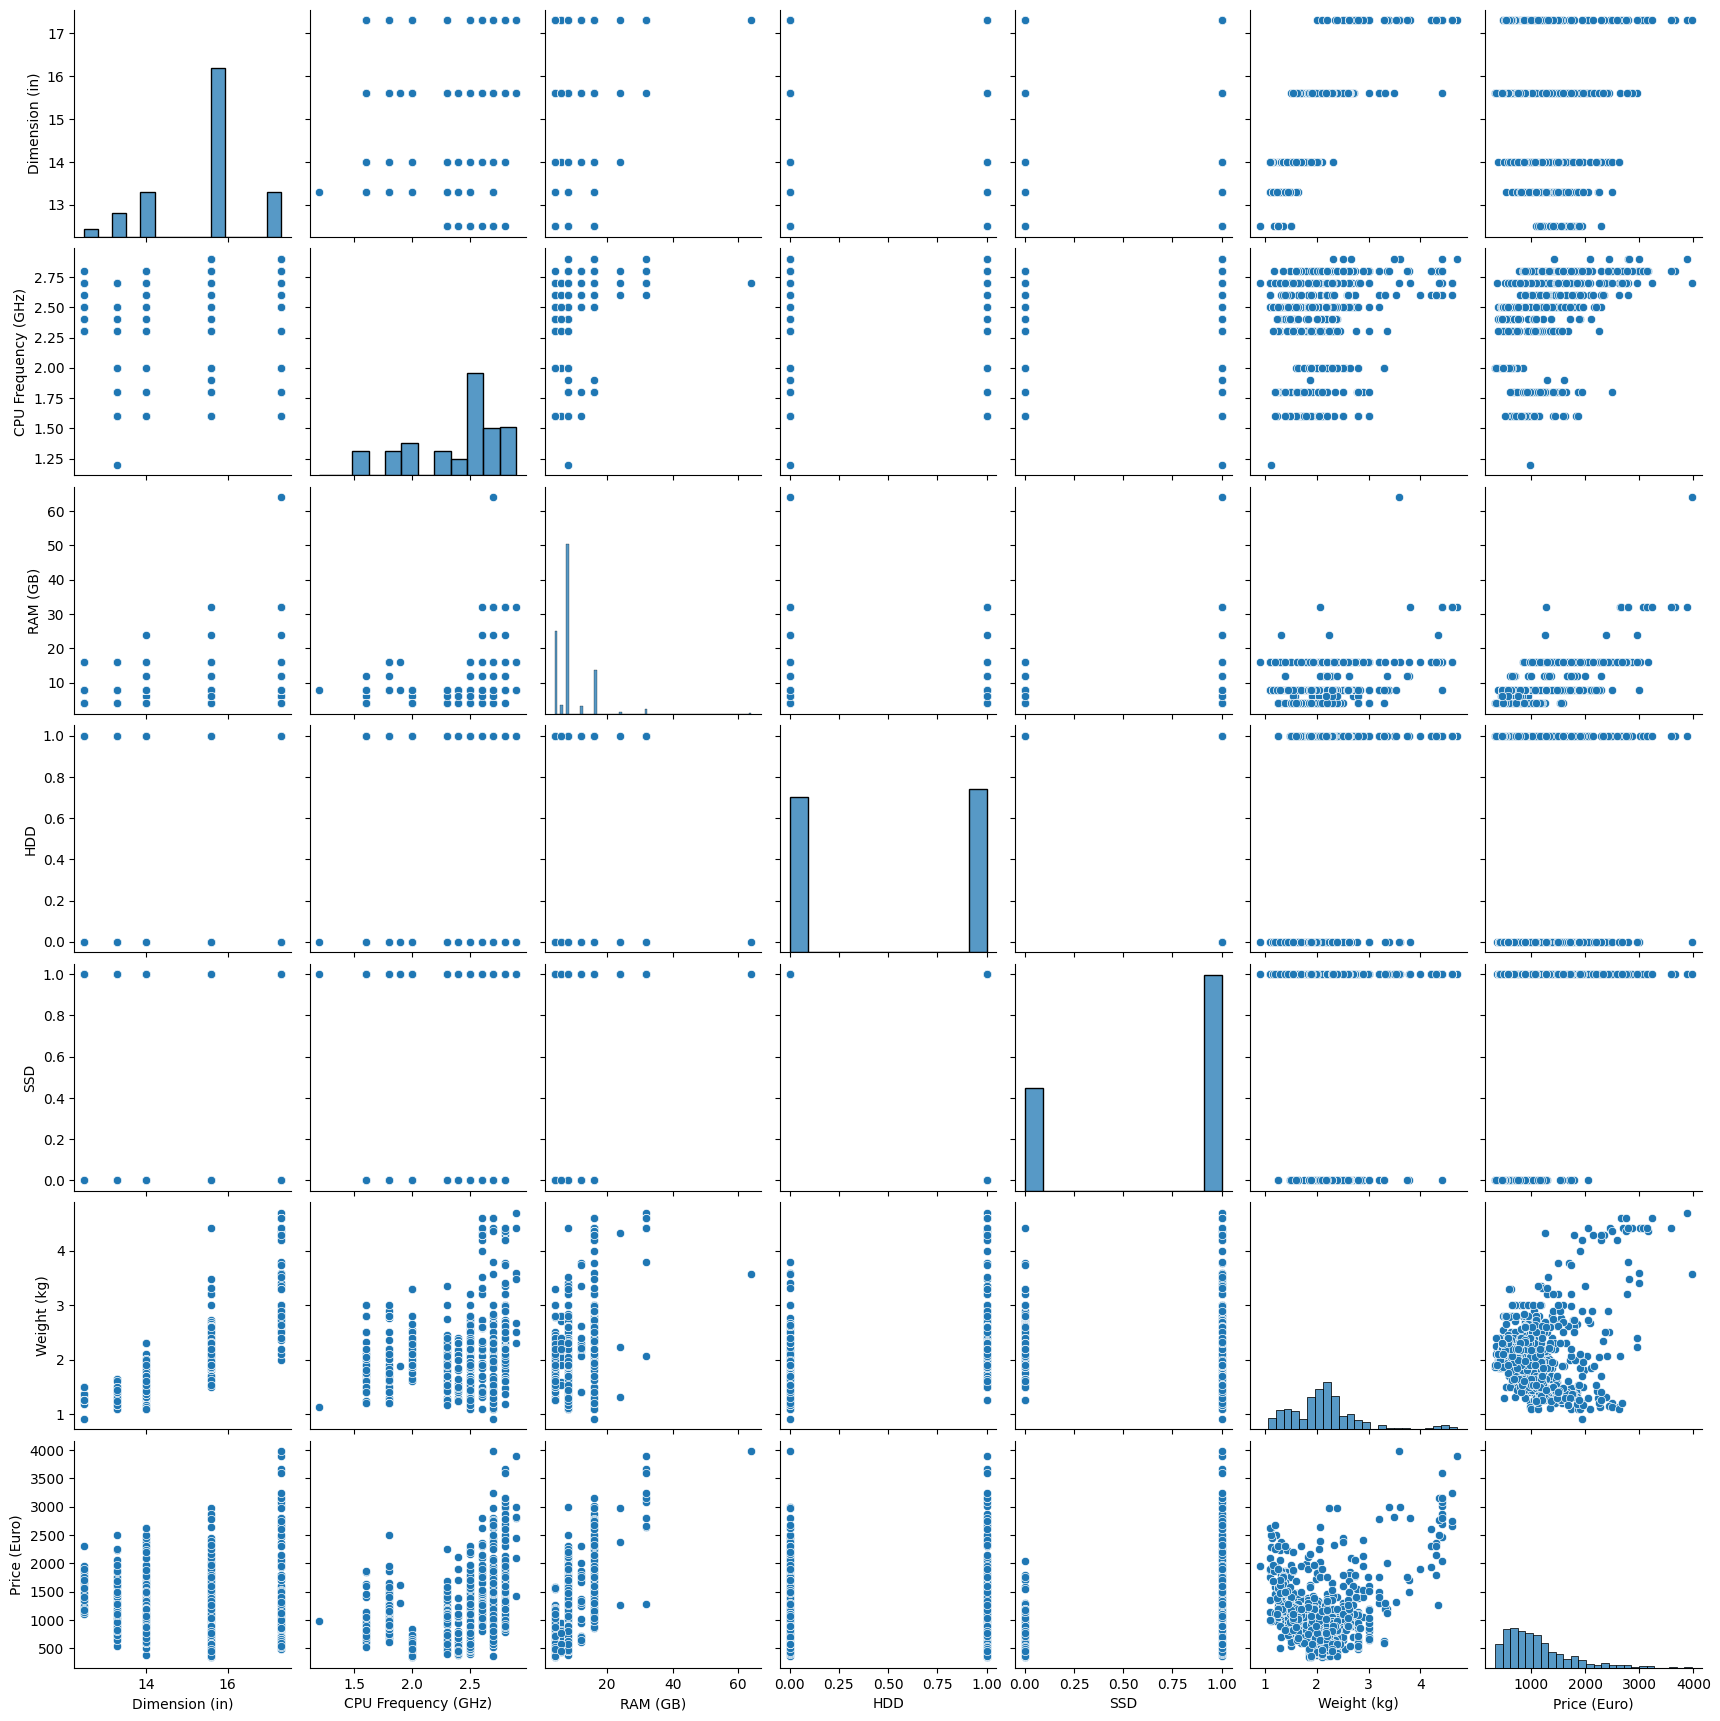

In [98]:
sns.pairplot(df)

In [ ]:
df["Brand"].value_counts()

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop(columns=["Brand"], inplace=True)

In [ ]:
df["Model"].value_counts()

In [ ]:
df.drop(columns=["Model"], inplace=True)

In [ ]:
df["Type"].value_counts()

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Type"])], axis=1)
df.drop(columns=["Type"], inplace=True)

In [ ]:
df[["Width", "Height"]] = df["Screen Resolution"].str.split("x").tolist()
df["Width"] = df["Width"].astype(int)
df["Height"] = df["Height"].astype(int)
df.drop(columns=["Screen Resolution"], inplace=True)

In [ ]:
df["CPU Brand"].value_counts()

In [ ]:
df.drop(columns=["CPU Brand"], inplace=True)

In [ ]:
df["CPU Model"].value_counts()

In [ ]:
df["CPU Model"] = df["CPU Model"].str[6:7].astype(int)
df.head()

In [ ]:
df["GPU Model"].value_counts()

In [ ]:
df.drop(columns=["GPU Model"], inplace=True)

In [ ]:
df["GPU Brand"].value_counts()

In [ ]:
df = pd.concat([df, pd.get_dummies(df["GPU Brand"])], axis=1)
df.drop(columns=["GPU Brand"], inplace=True)

In [ ]:
df["OS"].value_counts()

In [ ]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df[["Dimension (in)", "Weight (kg)"]].hist()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True)[["Weight (kg)", "Dimension (in)"]], annot=True, fmt=".2f", square=True)

In [ ]:
# gi redime tie sho imet nan vrednosti plus tie sho se visoko korelirani so niv (targetot ne)
cols = ["Weight (kg)", "Dimension (in)", "Gaming", "Ultrabook", "Intel", "Nvidia"]
iterative_imputer = IterativeImputer()
df[cols] = iterative_imputer.fit_transform(df[cols])

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(subset=["Price (Euro)"], axis=0, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
X, y = df.drop(columns=["Price (Euro)"]), df["Price (Euro)"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

#ni trebit model za regresija 

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

In [ ]:
regressor = RandomForestRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

In [ ]:
regressor = XGBRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

In [ ]:
param_grid = {
    "n_neighbors": range(2, 10 + 1),
}

In [ ]:
regressor = KNeighborsRegressor()

In [ ]:
grid_search = GridSearchCV(
    regressor,
    param_grid,
    scoring="r2",
    cv=5,
)

In [ ]:
grid_search.fit(train_X, train_y)

In [ ]:
grid_search.best_params_

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=8).fit(train_X, train_y)

pred_y = grid_search.predict(test_X)
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")